# R-Initialization

### R-Package Download

In [69]:
library(ggplot2) # For Plot Visualizations
library(car) # For Variance Inflation Factor function -- vif()
library(corrplot) # For Correlation Visualizations
library(data.table) # For Complex Data Frame Joins

### Plot Configuration

In [2]:
options(repr.plot.width = 6, repr.plot.height = 6) # Size of plots
alpha = 0.35 # Opacity of points on plots
size = 0.5 # Size of points on plots

### Data Configuration

In [38]:
outlier_coef = 50 # Points above outlier_coef * mean are discarded as outlier events
socioeco_vec = c("Low income","Lower middle income","Upper middle income","High income") # Tiers of Socioeconomic status

# R-Function Definition

In [327]:
# Residuals vs. Fitted Plot
res_v_fit_plot <- function(df.diagnostics,data) {
    ggplot(data=df.diagnostics,aes(x=yhat,y=r)) + geom_point(alpha=alpha,size=size) +
        geom_smooth(se=F,col="#CFB87C") + geom_hline(yintercept=0) +
        ggtitle("Residuals vs. Fitted") + xlab("Fitted/Predicted Values") + ylab("Residuals") + theme_bw()
}

# Normal Q-Q Plot
qq_plot <- function(df.diagnostics,data) {
    ggplot(data=df.diagnostics,aes(sample=(r-mean(r))/sd(r))) + stat_qq(alpha=alpha,size=size) + 
        geom_abline(slope=1,intercept=0,col="grey") +
        ggtitle("Normal Q-Q") + xlab("Theoretical Quantiles") + ylab("Residual Quantiles") + theme_bw()
}

# Fitted vs. Observed Plot
fit_v_obs_plot <- function(df.diagnostics,data) {
    ggplot(data=df.diagnostics,aes(x=y,y=yhat)) + geom_point(alpha=alpha,size=size) +
        geom_smooth(se=F,col="#CFB87C") + geom_abline(intercept=0,slope=1) +
        ggtitle("Fitted vs. Observed") + xlab("Observed Values") + ylab("Fitted/Predicted Values") + theme_bw()
}

# Successive Residuals Plot
suc_res_plot <- function(df.diagnostics,data) {
    e_i = head(df.diagnostics$r,dim(data)[1]-1)
    e_j = tail(df.diagnostics$r,dim(data)[1]-1)
    ggplot(data.frame(e_i,e_j),aes(x=e_i,y=e_j)) + geom_point(alpha=alpha,size=size) + 
        geom_vline(xintercept = 0) + geom_hline(yintercept = 0) + 
        ggtitle("Successive Residual Plot") + xlab(expression(hat(epsilon)[i])) + ylab(expression(hat(epsilon)[i+1])) + theme_bw()
}

# Residuals vs. Index Plot
res_v_ind_plot <- function(df.diagnostics,data) {
    ggplot(df.diagnostics,aes(x=1:dim(data)[1],y=r)) + 
        geom_point(alpha=alpha,size=size) + geom_smooth(se=F,col="#CFB87C") +
        ggtitle("Residuals vs. Index") + xlab("Index") + ylab("Residuals") + theme_bw()
}

In [333]:
# All Assumption Plots
assumption_plots <- function(df.diagnostics,data) {
    # Residuals vs. Fitted Plot
    p1 <- ggplot(data=df.diagnostics,aes(x=yhat,y=r)) + geom_point(alpha=alpha,size=size) +
        geom_smooth(se=F,col="#CFB87C") + geom_hline(yintercept=0) +
        ggtitle("Residuals vs. Fitted") + xlab("Fitted/Predicted Values") + ylab("Residuals") + theme_bw()

    # Normal Q-Q Plot
    p2 <- ggplot(data=df.diagnostics,aes(sample=(r-mean(r))/sd(r))) + stat_qq(alpha=alpha,size=size) + 
        geom_abline(slope=1,intercept=0,col="grey") +
        ggtitle("Normal Q-Q") + xlab("Theoretical Quantiles") + ylab("Residual Quantiles") + theme_bw()

    # Fitted vs. Observed Plot
    p3 <- ggplot(data=df.diagnostics,aes(x=y,y=yhat)) + geom_point(alpha=alpha,size=size) +
        geom_smooth(se=F,col="#CFB87C") + geom_abline(intercept=0,slope=1) +
        ggtitle("Fitted vs. Observed") + xlab("Observed Values") + ylab("Fitted/Predicted Values") + theme_bw()

    # Successive Residuals Plot
    e_i = head(df.diagnostics$r,dim(data)[1]-1)
    e_j = tail(df.diagnostics$r,dim(data)[1]-1)
    p4 <- ggplot(data.frame(e_i,e_j),aes(x=e_i,y=e_j)) + geom_point(alpha=alpha,size=size) + 
        geom_vline(xintercept = 0) + geom_hline(yintercept = 0) + 
        ggtitle("Successive Residual Plot") + xlab(expression(hat(epsilon)[i])) + ylab(expression(hat(epsilon)[i+1])) + theme_bw()

    # Residuals vs. Index Plot
    p5 <- ggplot(df.diagnostics,aes(x=1:dim(data)[1],y=r)) + 
        geom_point(alpha=alpha,size=size) + geom_smooth(se=F,col="#CFB87C") +
        ggtitle("Residuals vs. Index") + xlab("Index") + ylab("Residuals") + theme_bw()
    
    return(list(p1,p2,p3,p4,p5))
}

# Data Initialization

### Data Download

In [3]:
# Downloading Vaccination Data
vaccination = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")))

# Downloading Testing Data
testing = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv")))

# Downloading Hospitalization Data
hospitalization = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/hospitalizations/covid-hospitalizations.csv")))

# Downloading Deaths Data
death = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/cases_deaths/COVID-19%20Cases%20and%20deaths%20-%20WHO.csv")))
# deaths = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_deaths_per_million.csv")))



In [4]:
head(vaccination)
head(testing)
head(hospitalization)
head(death)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003


Entity,ISO.code,Date,Source.URL,Source.label,Notes,Cumulative.total,Daily.change.in.cumulative.total,Cumulative.total.per.thousand,Daily.change.in.cumulative.total.per.thousand,X7.day.smoothed.daily.change,X7.day.smoothed.daily.change.per.thousand,Short.term.positive.rate,Short.term.tests.per.case
Afghanistan - tests performed,AFG,2022-01-29,http://www.emro.who.int/images/stories/coronavirus/covid-sitrep-28.pdf,WHO Regional Office for the Eastern Mediterranean,,853003,NA,21.272,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-01-30,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-01-31,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-01,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-02,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-03,,,,NA,NA,NA,NA,NA,NA,NA,NA


entity,iso_code,date,indicator,value
Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.381
Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.492
Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000
Algeria,DZA,2020-07-20,Daily ICU occupancy per million,1.425


Country,Year,Daily.new.confirmed.cases.of.COVID.19,Daily.new.confirmed.deaths.due.to.COVID.19,Total.confirmed.cases.of.COVID.19,Total.confirmed.deaths.due.to.COVID.19,Daily.new.confirmed.cases.of.COVID.19.per.million.people,Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people,Total.confirmed.cases.of.COVID.19.per.million.people,Total.confirmed.deaths.due.to.COVID.19.per.million.people,...,Weekly.case.growth....,Weekly.death.growth....,Biweekly.cases,Biweekly.deaths,Biweekly.case.growth....,Biweekly.death.growth....,Weekly.cases.per.million.people,Weekly.deaths.per.million.people,Biweekly.cases.per.million.people,Biweekly.deaths.per.million.people
Afghanistan,-18,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-17,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-16,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-15,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-14,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-13,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,0,0,NA,NA


### Data Cleanup

In [5]:
# Restructure vaccination
# 2021-02-22 first term (407), 2020-01-12 — day 1
if (vaccination[1,3] != 407) {
    vaccination$date = as.numeric(vaccination$date)+(407-as.numeric(vaccination[1,3]))
}

In [6]:
# Restructure testing
# 2022-01-29 first term (748), 2020-01-12 -- day 1
testing <- transform(testing,location=sub(" .*", "", Entity)) # Creates location column, using regex on Entity column
colnames(testing)[colnames(testing)=="Date"]="date" # Renames Date column to date
if (testing[1,3] != 748) {
    testing$date = as.numeric(testing$date)+(748-as.numeric(testing[1,3]))
}

In [7]:
# Restructure hospitalization
# 2020-07-17 first term (187), 2020-01-12 -- day 1
if (hospitalization[1,3] != 187) {
    hospitalization$date = as.numeric(hospitalization$date)+(187-as.numeric(hospitalization[1,3]))
}
colnames(hospitalization)[colnames(hospitalization)=="entity"]="location" # Renames Date column to date
hospitalization = hospitalization[hospitalization[,4]=="Daily ICU occupancy",]
colnames(hospitalization)[colnames(hospitalization)=="value"]="icu_daily" # Renames value column to icu_daily

In [8]:
# Restructure deaths
# 2029-12-25 first term (-18), 2020-01-12 -- day 1
colnames(death)[colnames(death) == "Year"] ="date"
colnames(death)[colnames(death) == "Country"] ="location"

In [9]:
head(vaccination)
head(testing)
head(hospitalization)
head(death)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Afghanistan,AFG,407,0,0,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA
Afghanistan,AFG,408,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,409,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,410,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,411,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,412,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003


Entity,ISO.code,date,Source.URL,Source.label,Notes,Cumulative.total,Daily.change.in.cumulative.total,Cumulative.total.per.thousand,Daily.change.in.cumulative.total.per.thousand,X7.day.smoothed.daily.change,X7.day.smoothed.daily.change.per.thousand,Short.term.positive.rate,Short.term.tests.per.case,location
Afghanistan - tests performed,AFG,748,http://www.emro.who.int/images/stories/coronavirus/covid-sitrep-28.pdf,WHO Regional Office for the Eastern Mediterranean,,853003,NA,21.272,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,749,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,750,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,751,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,752,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,753,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan


,location,iso_code,date,indicator,icu_daily
1,Algeria,DZA,187,Daily ICU occupancy,62
3,Algeria,DZA,188,Daily ICU occupancy,67
5,Algeria,DZA,190,Daily ICU occupancy,64
7,Algeria,DZA,191,Daily ICU occupancy,56
9,Algeria,DZA,192,Daily ICU occupancy,51
11,Algeria,DZA,193,Daily ICU occupancy,66


location,date,Daily.new.confirmed.cases.of.COVID.19,Daily.new.confirmed.deaths.due.to.COVID.19,Total.confirmed.cases.of.COVID.19,Total.confirmed.deaths.due.to.COVID.19,Daily.new.confirmed.cases.of.COVID.19.per.million.people,Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people,Total.confirmed.cases.of.COVID.19.per.million.people,Total.confirmed.deaths.due.to.COVID.19.per.million.people,...,Weekly.case.growth....,Weekly.death.growth....,Biweekly.cases,Biweekly.deaths,Biweekly.case.growth....,Biweekly.death.growth....,Weekly.cases.per.million.people,Weekly.deaths.per.million.people,Biweekly.cases.per.million.people,Biweekly.deaths.per.million.people
Afghanistan,-18,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-17,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-16,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-15,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-14,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-13,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,0,0,NA,NA


# Data Analyses 1 -- Unprocessed Date & All Location

### Method 1:

We are looking purely at the deaths as a function of everything else. This being `Date`, `Location`, `Daily Testing`, `Daily ICU Occipancy`. We are looking at this as a density, to allow for better comparison between countries of different population magnitudes. We merge our data into a set:

In [144]:
data.method1.p1 = merge(x=death,y=vaccination,by=c("location","date")) # Merges death & vaccination data on location and date
data.method1.p1 = merge(x=data.method1.p1,y=testing,by=c("location","date")) # Merges testing data on location and date
data.method1.p1 = merge(x=data.method1.p1,y=hospitalization,by=c("location","date")) # Merges hospitalization data on location and date

# colnames(data.method1.p1)
data.method1.p1 <- data.frame(days_since_start=as.numeric(data.method1.p1$date),location=data.method1.p1$location,
                           deaths_daily_per_mil=data.method1.p1$Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people,
                           tests_daily_per_thd=data.method1.p1$Daily.change.in.cumulative.total.per.thousand,
                           icu_daily=data.method1.p1$icu_daily,vax_daily_per_mil=data.method1.p1$daily_vaccinations_per_million)

data.method1.p1 = na.omit(data.method1.p1)
data.method1.p1 = subset(data.method1.p1, data.method1.p1$deaths_daily_per_mil < outlier_coef * mean(data.method1.p1$deaths_daily_per_mil) &
                      !data.method1.p1$location%in%socioeco_vec)
# head(data.method1.p1)

In [147]:
lm_method1.p1 = lm(data=data.method1.p1,deaths_daily_per_mil~.)
df.diagnostics.method1.p1 = data.frame(yhat=fitted(lm_method1.p1),r=resid(lm_method1.p1),y=data.method1.p1$deaths_daily_per_mil,
                                    days_since_start=data.method1.p1$days_since_start,location=data.method1.p1$location,
                                    tests_daily_per_thd=data.method1.p1$tests_daily_per_thd,icu_daily=data.method1.p1$icu_daily,
                                    vax_daily_per_mil=data.method1.p1$vax_daily_per_mil)
summary(lm_method1.p1)


Call:
lm(formula = deaths_daily_per_mil ~ ., data = data.method1.p1)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.628  -1.328  -0.418   0.825  31.683 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.406e-01  2.193e-01   0.641    0.522    
days_since_start    -2.453e-03  1.695e-04 -14.468  < 2e-16 ***
locationAustralia    2.357e+00  2.004e-01  11.763  < 2e-16 ***
locationAustria      1.791e+00  2.139e-01   8.374  < 2e-16 ***
locationBelgium      2.904e+00  1.929e-01  15.052  < 2e-16 ***
locationBolivia      3.370e+00  2.069e-01  16.287  < 2e-16 ***
locationBulgaria     1.211e+01  5.297e-01  22.856  < 2e-16 ***
locationCanada       1.900e+00  1.878e-01  10.116  < 2e-16 ***
locationChile        2.426e+00  1.774e-01  13.678  < 2e-16 ***
locationCyprus       2.232e-01  2.551e-01   0.875    0.382    
locationCzechia      5.325e+00  1.916e-01  27.791  < 2e-16 ***
locationDenmark      2.555e+00  2.025e-01  12.620  < 2e-16 ***
lo

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


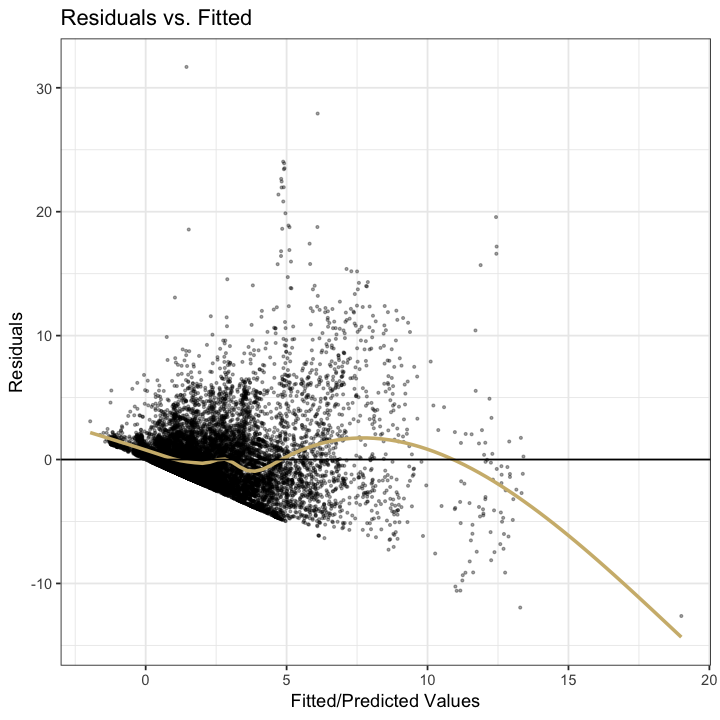

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


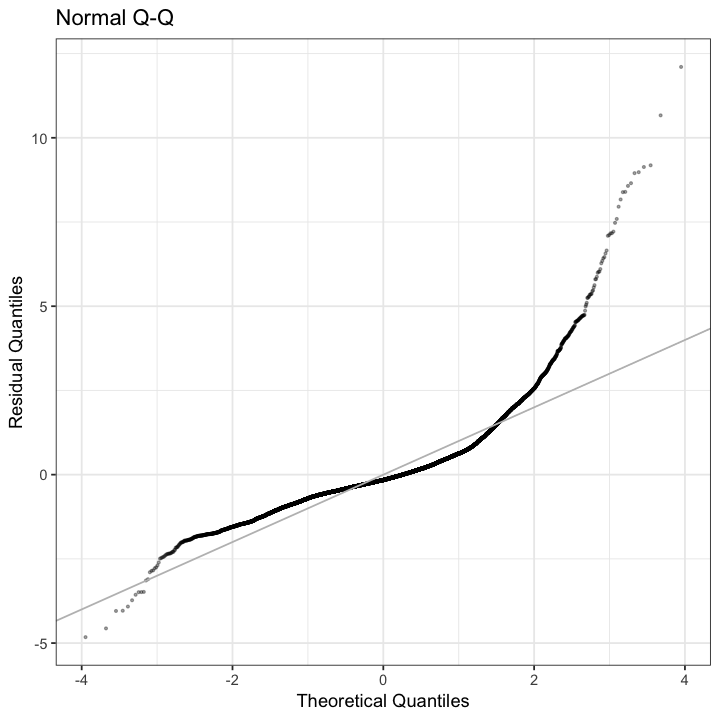

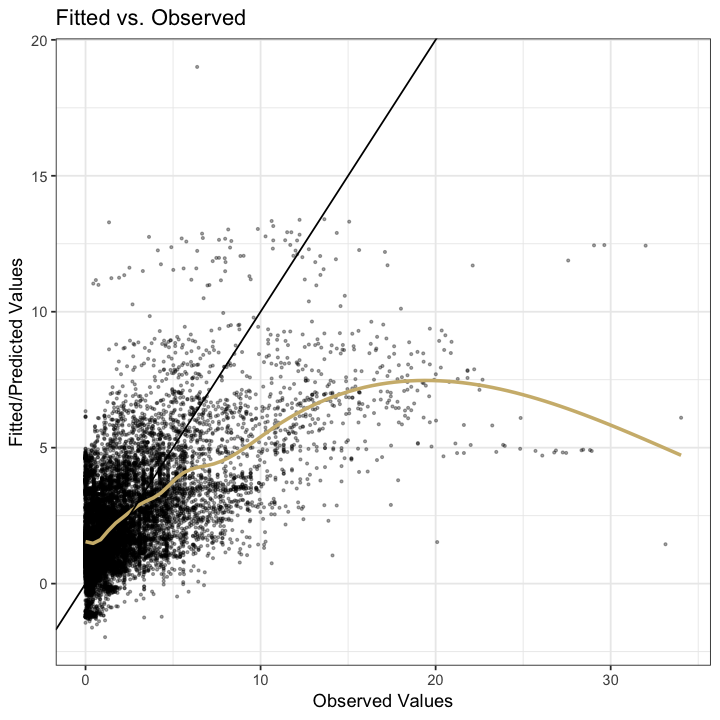

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


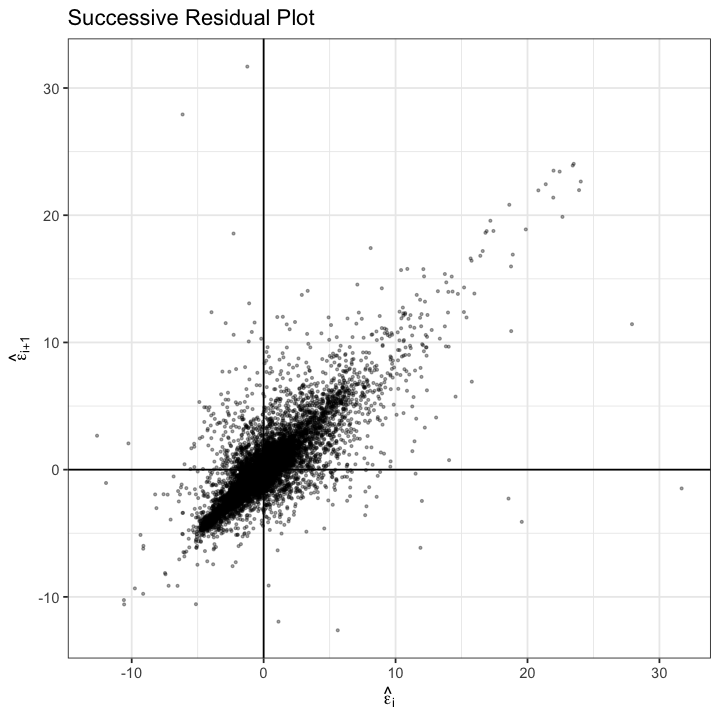

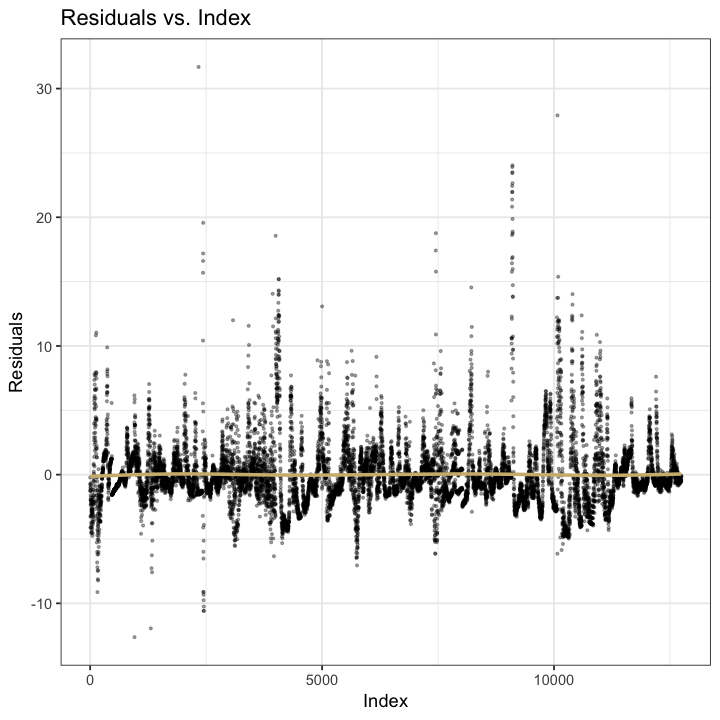

In [341]:
assumption_plots(df.diagnostics.method1.p1,data.method1.p1)[1:5]

In [150]:
vif(lm_method1.p1)

,GVIF,Df,GVIF^(1/(2*Df))
days_since_start,1.227064,1,1.107729
location,7.265978,29,1.034784
tests_daily_per_thd,2.714880,1,1.647689
icu_daily,2.700160,1,1.643216
vax_daily_per_mil,1.165397,1,1.079535


### Method 2:

For this method, we are going to be observing the daily death density vs Date, Socioeconomic Status, and vaccination density for starters

In [151]:
data.method2.p1 = merge(x=death,y=vaccination,by=c("location","date")) # Merges death & vaccination data on location and date

# colnames(data.method2)
data.method2.p1 <- data.frame(days_since_start=as.numeric(data.method2.p1$date),economic_status=data.method2.p1$location,
                           deaths_daily_per_mil=data.method2.p1$Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people,
                           vax_daily_per_mil=data.method2.p1$daily_vaccinations_per_million)

data.method2.p1 = na.omit(data.method2.p1)
data.method2.p1 = subset(data.method2.p1, data.method2.p1$deaths_daily_per_mil < outlier_coef * mean(data.method2.p1$deaths_daily_per_mil) &
                      data.method2.p1$economic_status%in%socioeco_vec)
head(data.method2.p1)

,days_since_start,economic_status,deaths_daily_per_mil,vax_daily_per_mil
62604,1000,High income,0.531,1118
62605,1001,High income,0.910,1122
62606,1002,High income,1.129,1116
62607,1003,High income,1.091,1131
62608,1004,High income,0.669,1153
62609,1005,High income,2.677,1166


In [152]:
lm_method2.p1 = lm(data=data.method2.p1,deaths_daily_per_mil~.)
df.diagnostics.method2.p1 = data.frame(yhat=fitted(lm_method2.p1),r=resid(lm_method2.p1),y=data.method2.p1$deaths_daily_per_mil,
                                    days_since_start=data.method2.p1$days_since_start,economic_status=data.method2.p1$economic_status,
                                    vax_daily_per_mil=data.method2.p1$vax_daily_per_mil)
summary(lm_method2.p1)


Call:
lm(formula = deaths_daily_per_mil ~ ., data = data.method2.p1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0610 -0.3734 -0.0715  0.3047  8.8224 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         3.661e+00  6.496e-02  56.354   <2e-16 ***
days_since_start                   -2.183e-03  6.336e-05 -34.459   <2e-16 ***
economic_statusLow income          -1.875e+00  4.217e-02 -44.469   <2e-16 ***
economic_statusLower middle income -1.601e+00  3.917e-02 -40.870   <2e-16 ***
economic_statusUpper middle income -1.052e+00  3.828e-02 -27.477   <2e-16 ***
vax_daily_per_mil                  -1.104e-05  7.873e-06  -1.402    0.161    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7875 on 3277 degrees of freedom
Multiple R-squared:  0.5666,	Adjusted R-squared:  0.5659 
F-statistic: 856.7 on 5 and 3277 DF,  p-value: < 2.2e-16


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


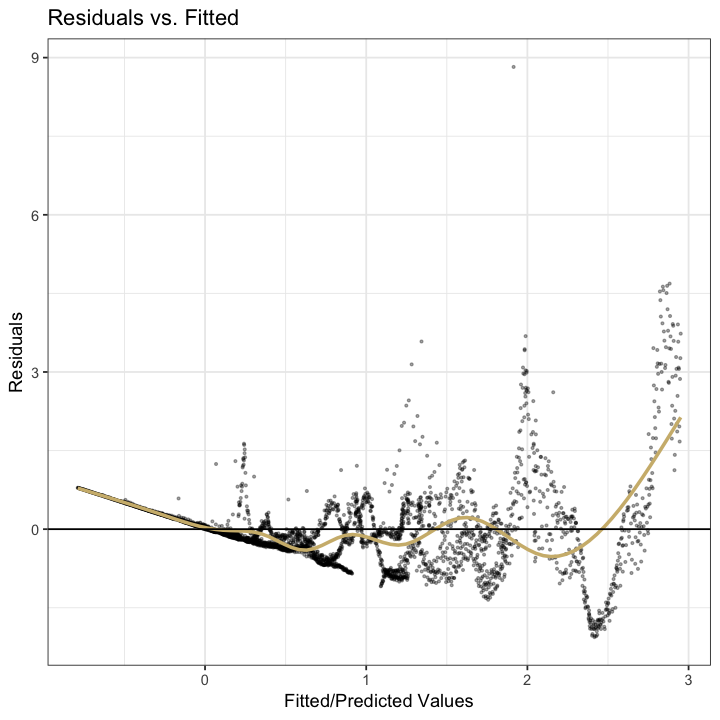

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


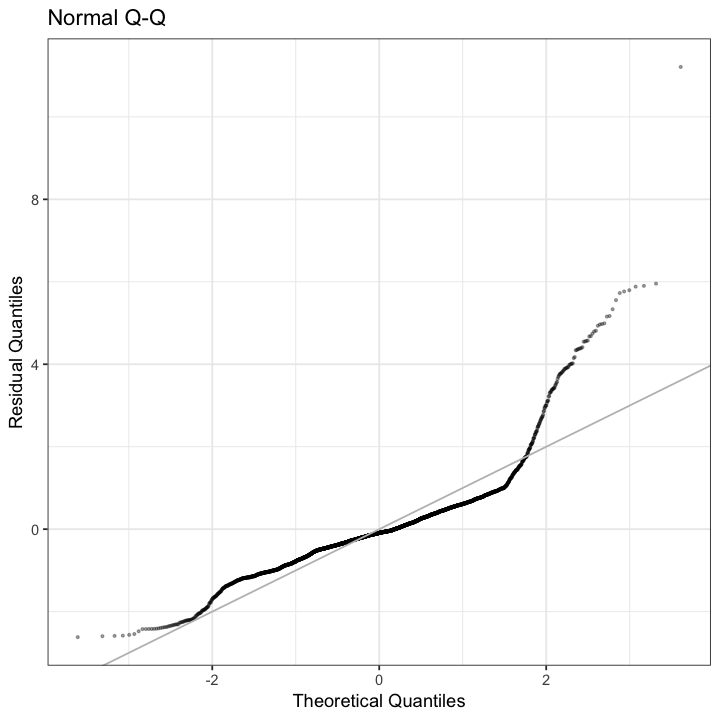

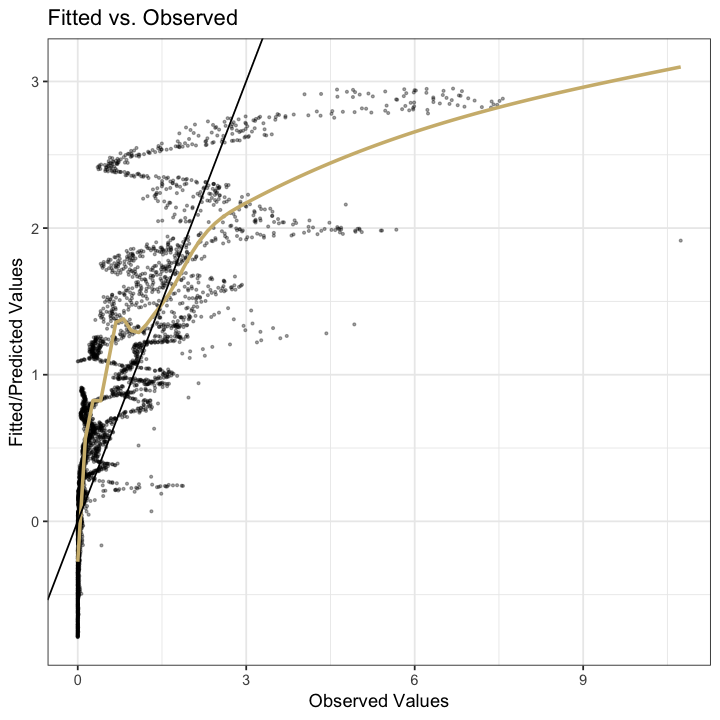

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


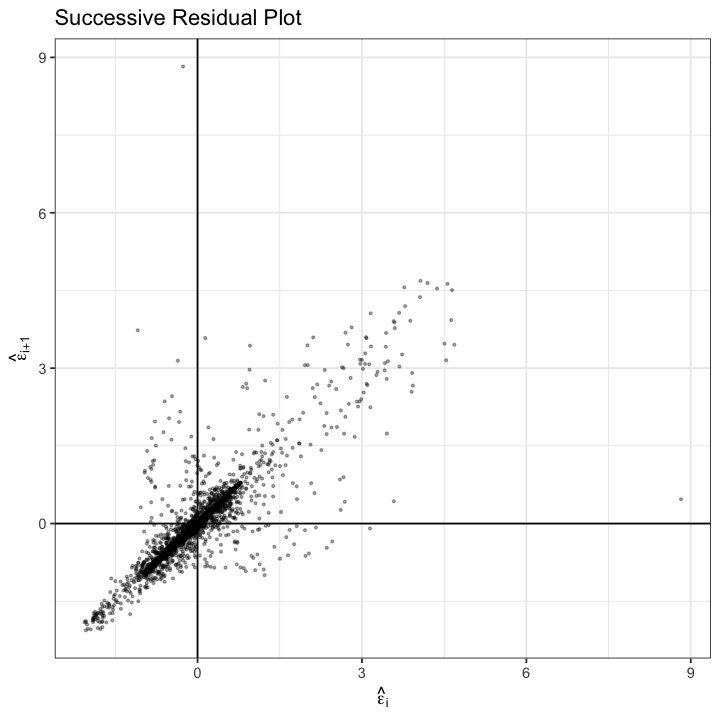

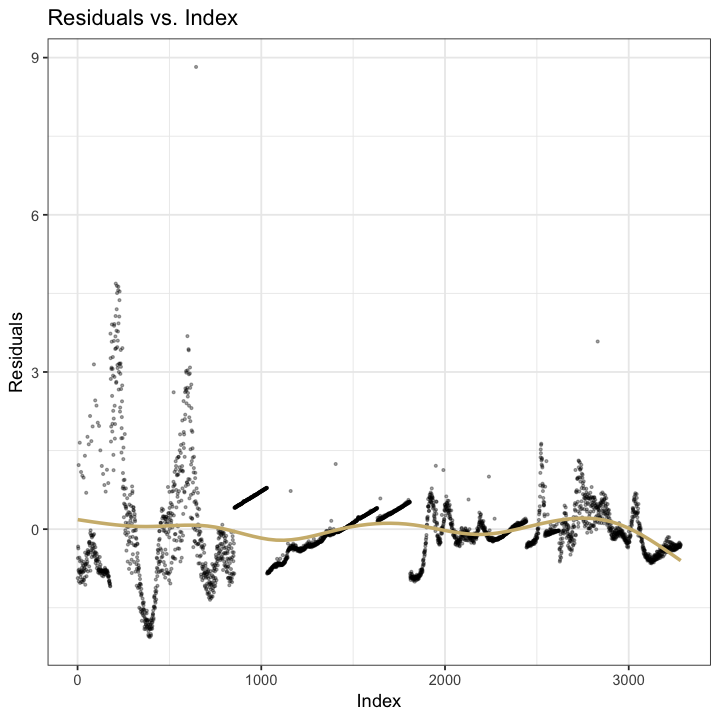

In [342]:
assumption_plots(df.diagnostics.method2.p1,data.method2.p1)

### Method 3
For this method, we are going to be observing the effects that the positive test rate has, as a result of the testing density, vaccinnation density, socioeconomic status, and date.

In [154]:
data.method3.p1 = merge(x=testing,y=vaccination,by=c("location","date")) # Merges testing & vaccination data on location and date

colnames(data.method3.p1)
data.method3.p1 <- data.frame(days_since_start=as.numeric(data.method3.p1$date),location=data.method3.p1$location,
                           positive_testing_rate=data.method3.p1$Short.term.positive.rate,
                           vax_daily_per_mil=data.method3.p1$daily_vaccinations_per_million,
                           tests_daily_per_thd=data.method3.p1$Daily.change.in.cumulative.total.per.thousand)

data.method3.p1 = na.omit(data.method3.p1)
# data.method3.p1 = subset(data.method3.p1,data.method3.p1$economic_status%in%socioeco_vec)
head(data.method3.p1)

[1] "location"                                     
 [2] "date"                                         
 [3] "Entity"                                       
 [4] "ISO.code"                                     
 [5] "Source.URL"                                   
 [6] "Source.label"                                 
 [7] "Notes"                                        
 [8] "Cumulative.total"                             
 [9] "Daily.change.in.cumulative.total"             
[10] "Cumulative.total.per.thousand"                
[11] "Daily.change.in.cumulative.total.per.thousand"
[12] "X7.day.smoothed.daily.change"                 
[13] "X7.day.smoothed.daily.change.per.thousand"    
[14] "Short.term.positive.rate"                     
[15] "Short.term.tests.per.case"                    
[16] "iso_code"                                     
[17] "total_vaccinations"                           
[18] "people_vaccinated"                            
[19] "people_fully_vaccinated"                      
[20] "total_boosters"                               
[21] "daily_vaccinations_raw"                       
[22] "daily_vaccinations"                           
[23] "total_vaccinations_per_hundred"               
[24] "people_vaccinated_per_hundred"                
[25] "people_fully_vaccinated_per_hundred"          
[26] "total_boosters_per_hundred"                   
[27] "daily_vaccinations_per_million"               
[28] "daily_people_vaccinated"                      
[29] "daily_people_vaccinated_per_hundred"

,days_since_start,location,positive_testing_rate,vax_daily_per_mil,tests_daily_per_thd
148,365,Albania,0.1812,23,0.552
149,366,Albania,0.1788,23,1.306
150,367,Albania,0.1825,22,1.158
151,368,Albania,0.1807,23,1.294
152,369,Albania,0.1825,22,1.237
153,370,Albania,0.1913,22,1.061


In [155]:
lm_method3.p1 = lm(data=data.method3.p1,positive_testing_rate~.)
df.diagnostics.method3.p1 = data.frame(yhat=fitted(lm_method3.p1),r=resid(lm_method3.p1),y=data.method3.p1$positive_testing_rate,
                                    days_since_start=data.method3.p1$days_since_start,location=data.method3.p1$location,
                                    vax_daily_per_mil=data.method3.p1$vax_daily_per_mil)
summary(lm_method3.p1)


Call:
lm(formula = positive_testing_rate ~ ., data = data.method3.p1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38419 -0.07044 -0.01787  0.04709  0.89231 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.674e-02  5.931e-03   2.822 0.004779 ** 
days_since_start       2.541e-04  4.271e-06  59.507  < 2e-16 ***
locationAngola        -1.581e-01  4.822e-02  -3.279 0.001042 ** 
locationArgentina      1.277e-02  7.135e-03   1.790 0.073404 .  
locationArmenia       -9.296e-02  7.472e-03 -12.442  < 2e-16 ***
locationAustralia     -1.373e-02  7.268e-03  -1.889 0.058956 .  
locationAustria       -1.519e-01  7.750e-03 -19.598  < 2e-16 ***
locationAzerbaijan    -4.920e-02  1.042e-02  -4.723 2.33e-06 ***
locationBahamas       -8.330e-02  1.275e-02  -6.533 6.56e-11 ***
locationBahrain       -7.445e-02  8.512e-03  -8.746  < 2e-16 ***
locationBangladesh    -4.968e-02  7.406e-03  -6.708 2.00e-11 ***
locationBarbados      -6.484e-

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


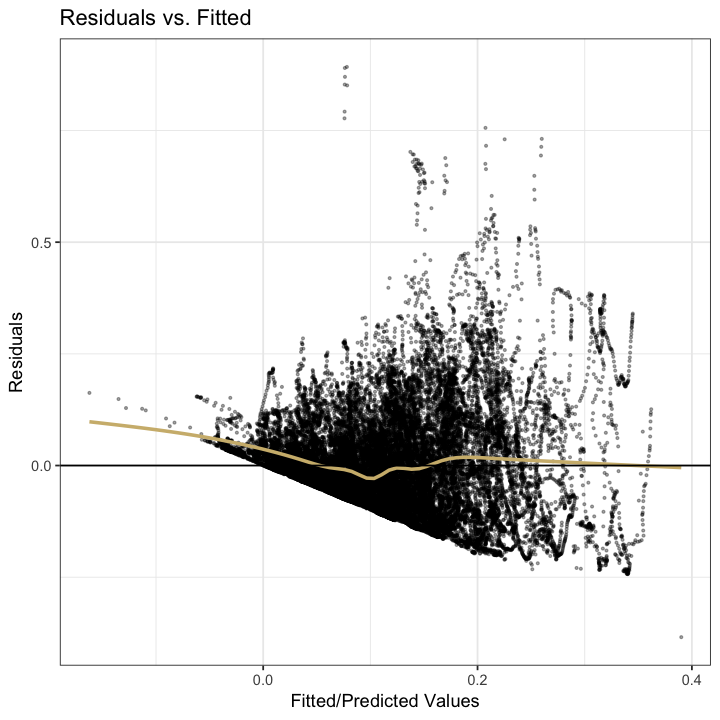

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


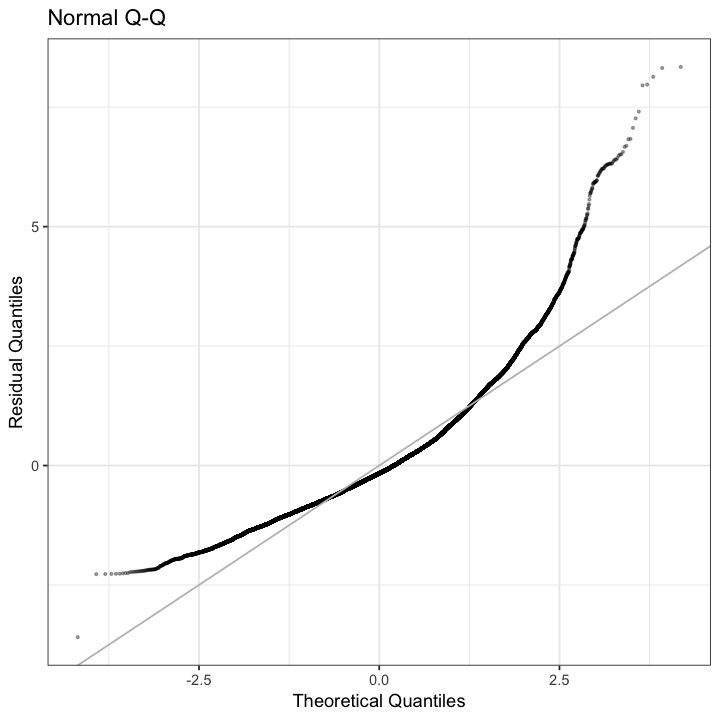

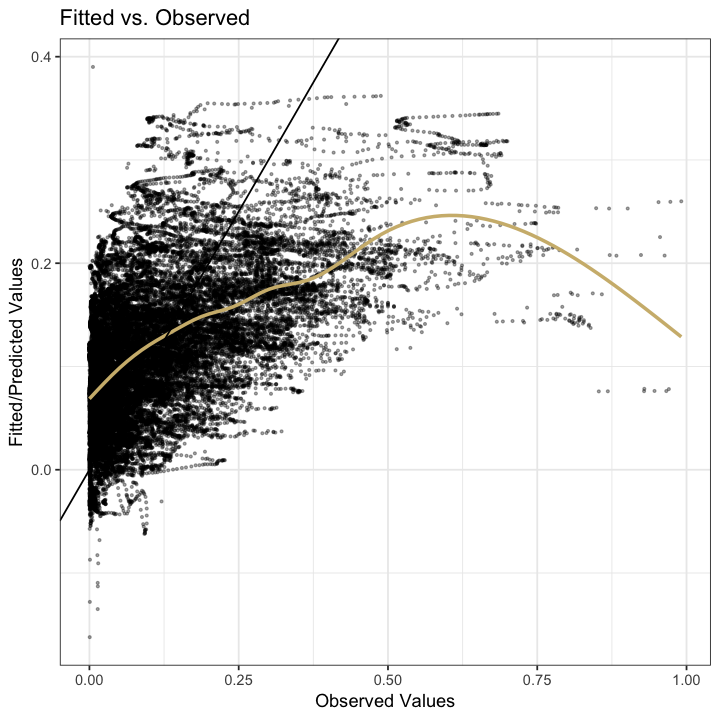

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


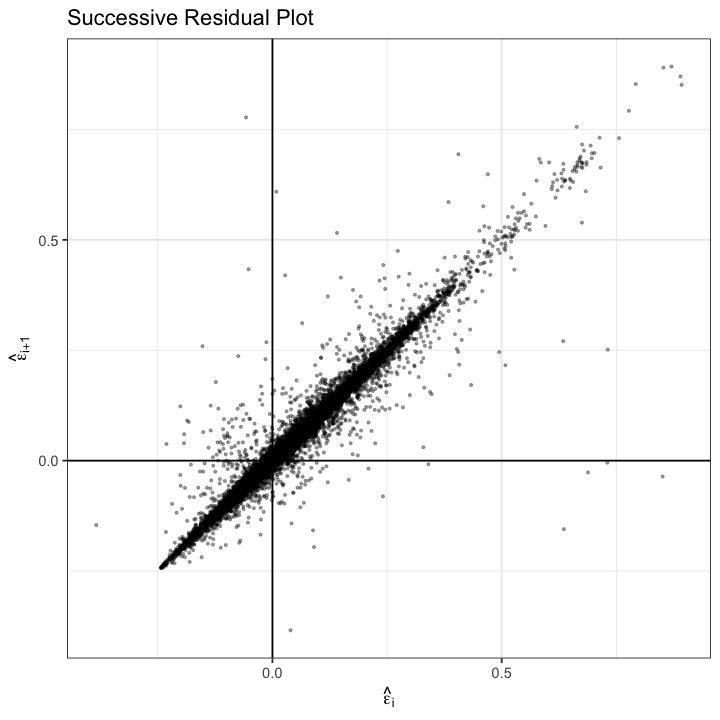

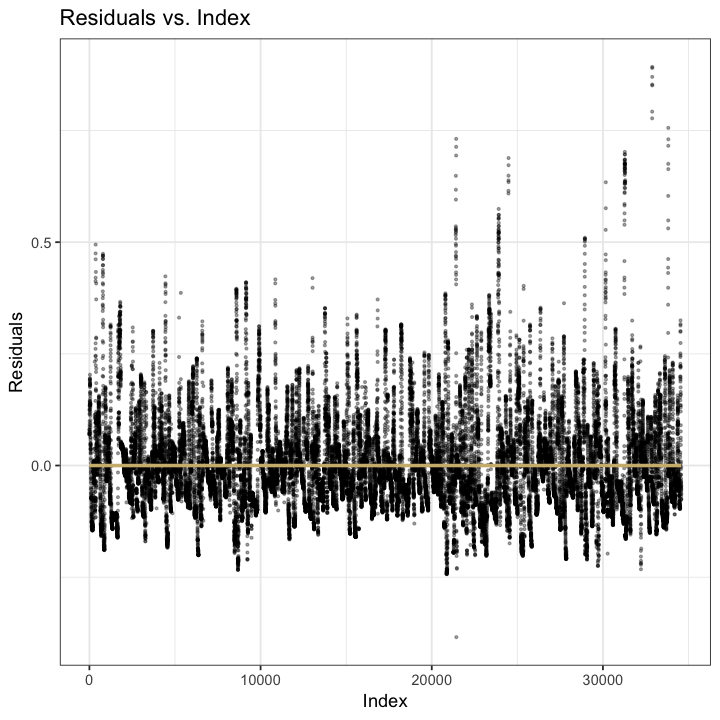

In [343]:
assumption_plots(df.diagnostics.method3.p1,data.method3.p1)

# Data Analysis 2 -- Date Transformation & Selected Location

### Method 1

Now, we are retrying our Part 1 Method 1 analysis, however, we are accounting for some things that were neglected earlier. Mainly, we are accounting for the non-linear relationship between `Date` and deaths, as well as the chaotic combination of locational data that should otherwise not be combined.

Because of the non-linear relationship between `Date` and deaths, we will be examining the `total_deaths_per_mil` rather than `deaths_daily_per_mil`. This is because it allows for a model of the relationship using the sigmoid function:

$$ \sigma(x) = \frac{1}{1+\exp\{-x\}}$$

Or in our case, because we want more controllability over the functional shape and translation:

$$ \sigma(x; A,m,s,o) = \frac{A - o}{1 + \exp \left\{\frac{m - x}{s}\right\}} + o $$

where $A = $ Upper-Asymptote, $m = $ Inflection Point, $s = $ Scale of Curvature, $o = $ Lower-Asymptote. Using this functional form, we will be transforming the `Date` predictor, as well as running a weighted linear regression.

Because of the chaotic nature of combining all different locational data sets together into one, we require looking at a specific location in efforts for understanding the disease spread as a function of a location, and being able to translate that into all other locations. For this, we will select Denmark as a location, because they have the highest data point number for the data we are attempting to analyze.

In [357]:
# loc = "Denmark"
# loc = "Finland"
loc = "Malaysia"

data.method1.p2 = merge(x=death,y=vaccination,by=c("location","date")) # Merges death & vaccination data on location and date
data.method1.p2 = merge(x=data.method1.p2,y=testing,by=c("location","date")) # Merges testing data on location and date
data.method1.p2 = merge(x=data.method1.p2,y=hospitalization,by=c("location","date")) # Merges hospitalization data on location and date

# colnames(data.method1.p2)
data.method1.p2 <- data.frame(days_since_start=as.numeric(data.method1.p2$date),location=data.method1.p2$location,
                              total_deaths_per_mil=data.method1.p2$Total.confirmed.deaths.due.to.COVID.19.per.million.people,
                              tests_daily_per_thd=data.method1.p2$Daily.change.in.cumulative.total.per.thousand,
                              icu_daily=data.method1.p2$icu_daily,vax_daily_per_mil=data.method1.p2$daily_vaccinations_per_million)

data.method1.p2 = na.omit(data.method1.p2)
data.method1.p2 = subset(data.method1.p2,!data.method1.p2$location%in%socioeco_vec&data.method1.p2$location==loc)
head(data.method1.p2)

,days_since_start,location,total_deaths_per_mil,tests_daily_per_thd,icu_daily,vax_daily_per_mil
8631,410,Malaysia,34.150,2.559,274,34
8632,411,Malaysia,34.357,2.389,255,78
8633,412,Malaysia,34.445,1.893,257,118
8634,413,Malaysia,34.681,1.773,258,138
8635,414,Malaysia,34.946,1.820,248,201
8636,415,Malaysia,35.093,1.933,251,274



Formula: y ~ (Asym - Off)/(1 + exp((xmid - x)/scal)) + Off

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
Asym 1005.1689     2.6295 382.259  < 2e-16 ***
xmid  590.4043     0.6926 852.444  < 2e-16 ***
scal   34.3774     0.6140  55.991  < 2e-16 ***
Off    19.2650     4.4239   4.355 1.63e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.93 on 476 degrees of freedom

Algorithm "port", convergence message: relative convergence (4)


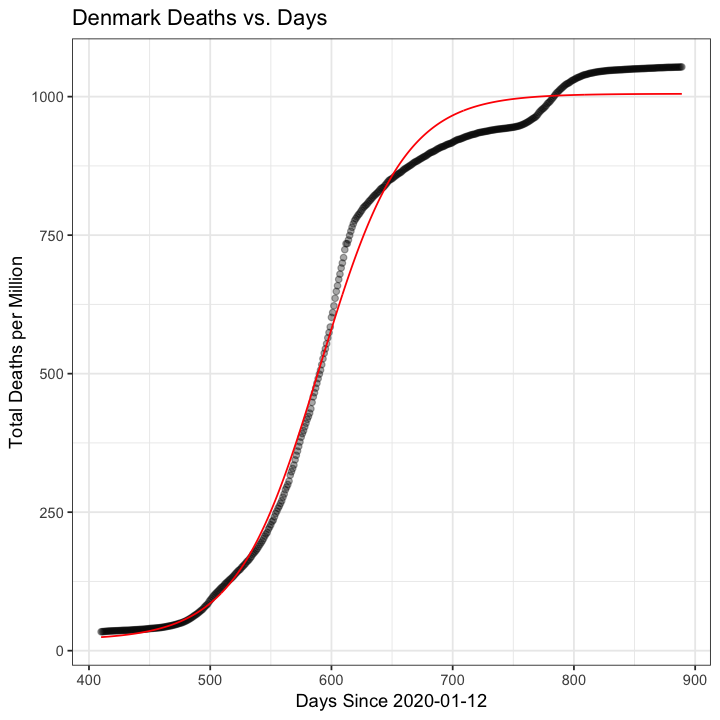

In [358]:
y = data.method1.p2$total_deaths_per_mil
x = data.method1.p2$days_since_start

nlmod.method1.p2 = nls(y~(Asym-Off)/(1+exp((xmid-x)/scal))+Off,
           start=list(Asym=max(y),xmid=(max(x)-min(x))/2,scal=60,Off=min(y)),
           data=data.frame(x,y),
           algorithm='port')

summary(nlmod.method1.p2)

ggplot(data=data.frame(x,y),aes(x=x,y=y)) + 
    geom_point(alpha=alpha,size=3*size) + 
    geom_line(data=data.frame(x=x,y=predict(nlmod.method1.p2,data.frame(x))),color="red") +
    ggtitle("Denmark Deaths vs. Days") + xlab("Days Since 2020-01-12") + ylab("Total Deaths per Million") + theme_bw()

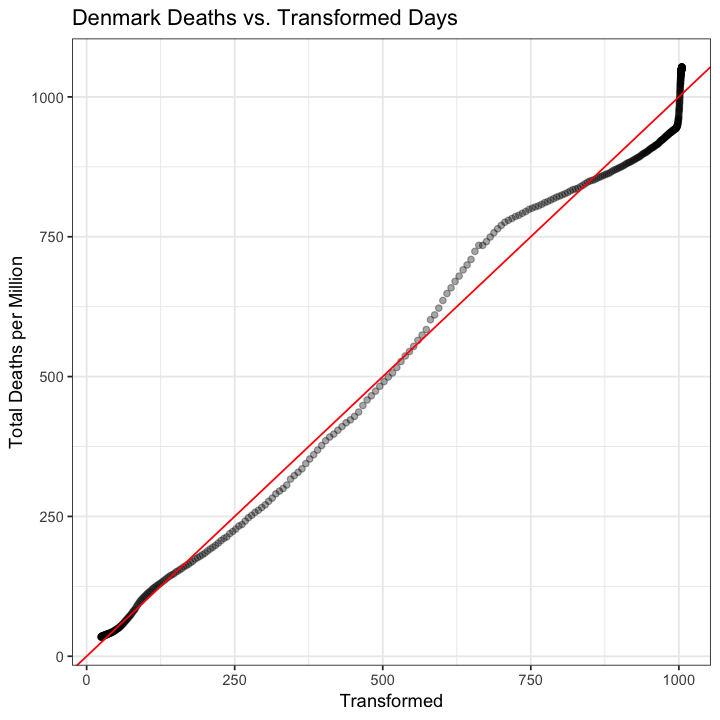

In [359]:
p = coef(nlmod.method1.p2)
data.method1.p2$transformed_date = (p[1]-p[4])/(1+exp((p[2]-data.method1.p2$days_since_start)/p[3]))+p[4]
y = data.method1.p2$total_deaths_per_mil
x = data.method1.p2$transformed_date

ggplot(data=data.frame(x,y),aes(x=x,y=y)) + 
    geom_point(alpha=alpha,size=3*size) + 
    geom_abline(slope=1,intercept=0,color="red") +
    ggtitle("Denmark Deaths vs. Transformed Days") + xlab("Transformed") + ylab("Total Deaths per Million") + theme_bw()

In [360]:
lm_method1.p2 = lm(data=data.method1.p2,
                     total_deaths_per_mil~tests_daily_per_thd+icu_daily+vax_daily_per_mil+transformed_date)
df.diagnostics.method1.p2 = data.frame(yhat=fitted(lm_method1.p2),r=resid(lm_method1.p2),y=data.method1.p2$total_deaths_per_mil,
                                    days_since_start=data.method1.p2$days_since_start,location=data.method1.p2$location,
                                    tests_daily_per_thd=data.method1.p2$tests_daily_per_thd,icu_daily=data.method1.p2$icu_daily,
                                    vax_daily_per_mil=data.method1.p2$vax_daily_per_mil,transformed_date=data.method1.p2$transformed_date)
summary(lm_method1.p2)


Call:
lm(formula = total_deaths_per_mil ~ tests_daily_per_thd + icu_daily + 
    vax_daily_per_mil + transformed_date, data = data.method1.p2)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.847 -19.544   3.411  20.840  79.230 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.1728640  4.3193139   0.966    0.334    
tests_daily_per_thd -9.4842145  1.0199106  -9.299  < 2e-16 ***
icu_daily            0.0493967  0.0063219   7.814 3.60e-14 ***
vax_daily_per_mil   -0.0047401  0.0006399  -7.408 5.91e-13 ***
transformed_date     1.0301788  0.0045964 224.128  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.21 on 475 degrees of freedom
Multiple R-squared:  0.9947,	Adjusted R-squared:  0.9947 
F-statistic: 2.242e+04 on 4 and 475 DF,  p-value: < 2.2e-16


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


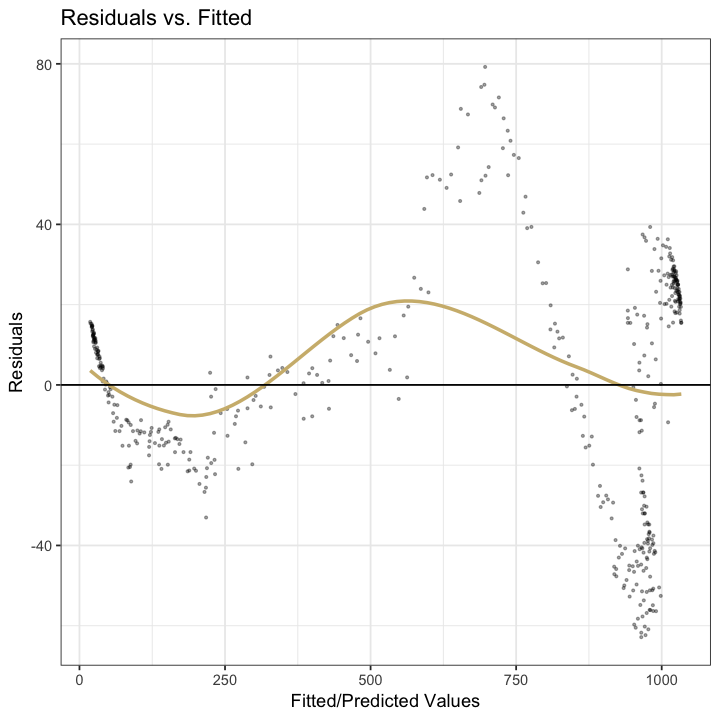

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


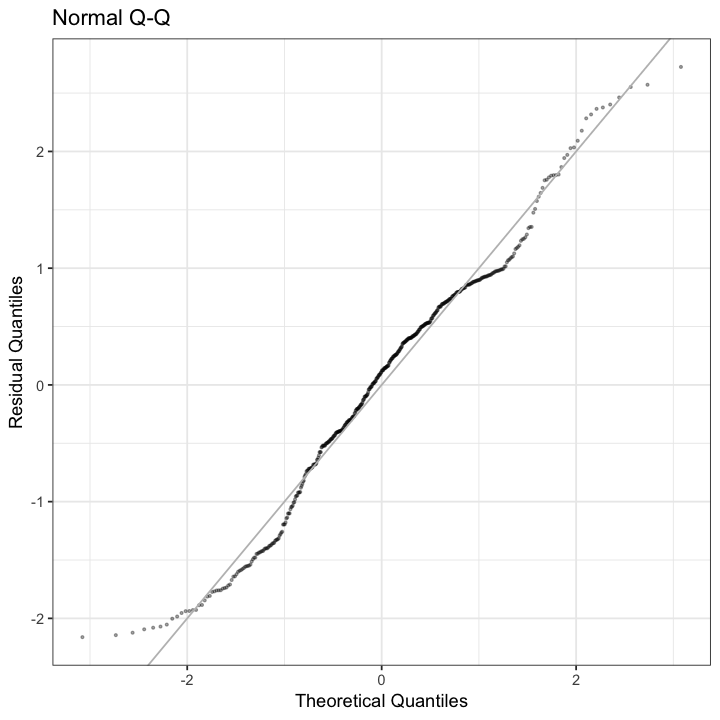

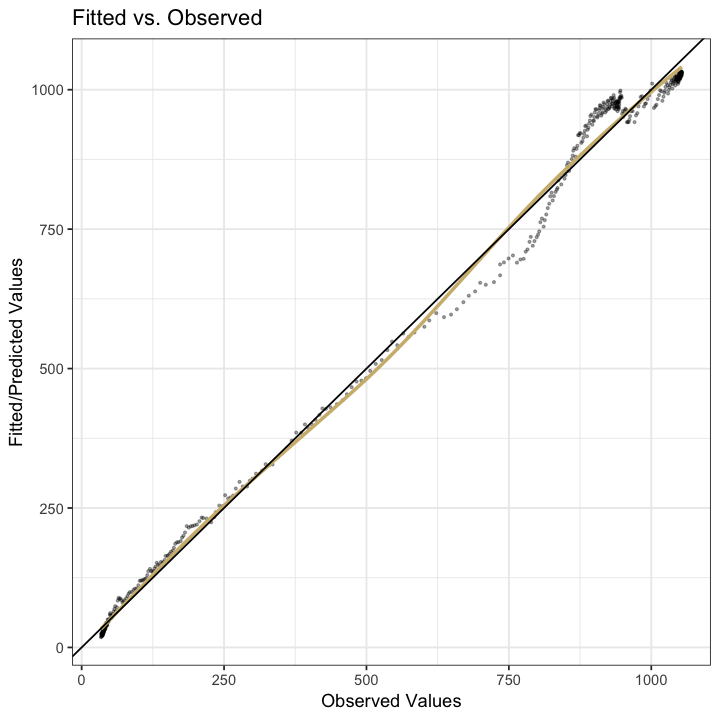

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


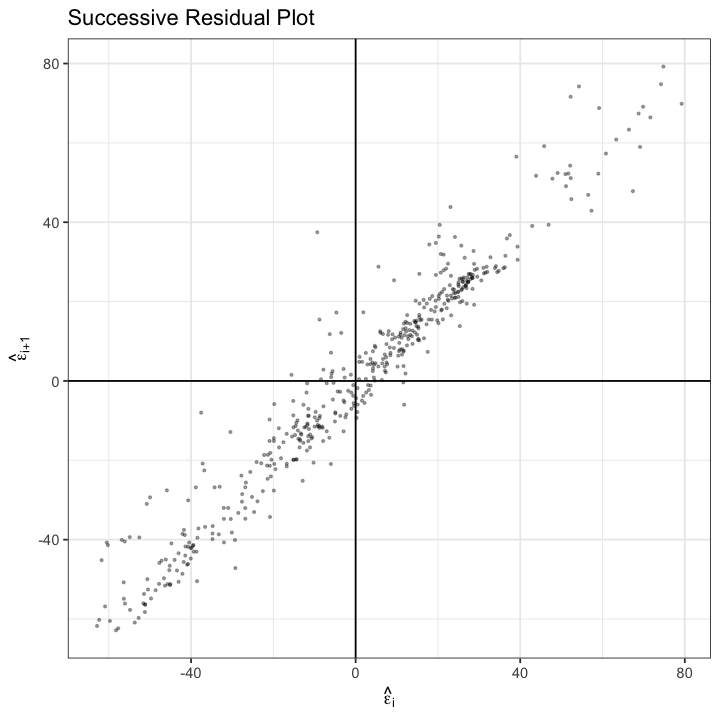

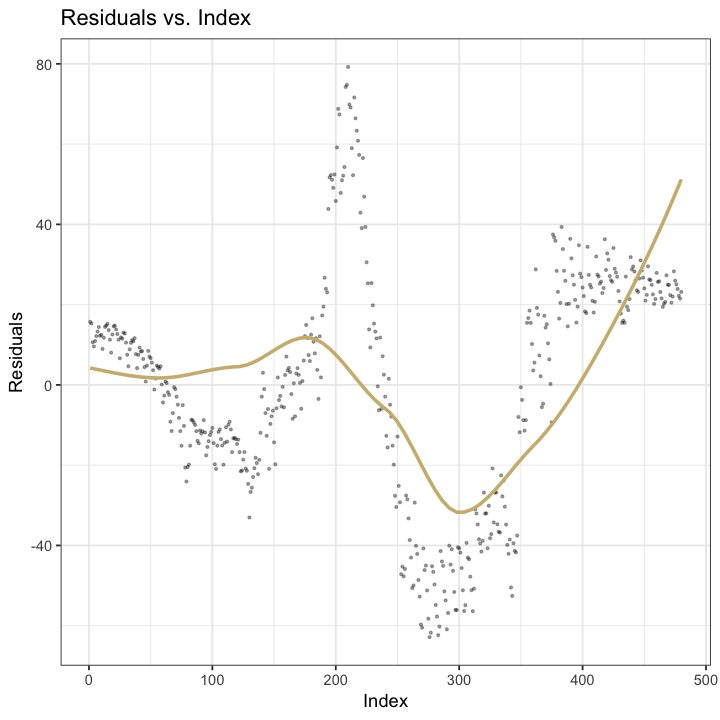

In [361]:
assumption_plots(df.diagnostics.method1.p2,data.method1.p2)